## Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats  # Add this line for importing the stats module

In [3]:
# Define path
path = r'/Users/azadeh/Documents/CitiBike Data Quest/'

In [4]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

In [5]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0


In [6]:
df['trip_duration'].mean()

838.9829

In [7]:
df['trip_duration'].median() # Check the median

672.0

In [8]:
df['trip_duration'].max() # Check the max

2697

In [9]:
df['trip_duration'].min()

60

/var/folders/4h/rfmmvwhd05z_ywjwzkv5fv7c0000gn/T/ipykernel_70351/2108612845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trip_duration'], bins=25)


<Axes: xlabel='trip_duration', ylabel='Density'>

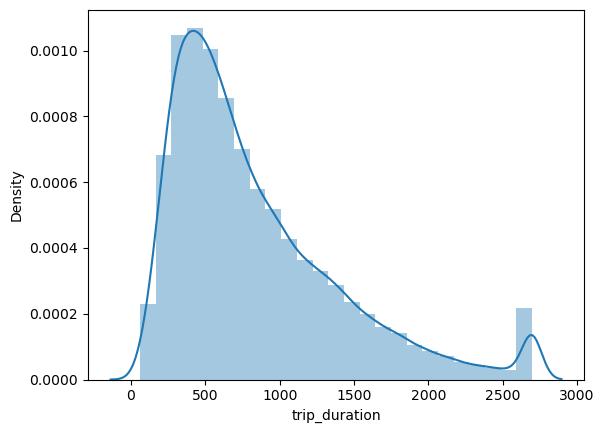

In [10]:
sns.distplot(df['trip_duration'], bins=25)

Dependent Variable:
trip_duration: This could be a reasonable choice for the dependent variable, especially if you are interested in predicting or analyzing the duration of bike trips.

Independent Variables:
start_hour: The hour when the trip started could be an independent variable. It might influence the duration or other aspects of the trip.
weekday: The day of the week could be another independent variable. Different days might have different patterns in terms of bike usage.
start_station_id: The ID of the starting station could be relevant. It might indicate 

In [13]:
# Assuming 'trip_duration' is in seconds
df['trip_duration_minutes'] = df['trip_duration'] / 60

# Calculate Z-scores
z_scores = stats.zscore(df['trip_duration_minutes'])

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Remove rows with outliers
df_no_outliers = df[abs(z_scores) < threshold]

### 3. Data prep for regression analysis 

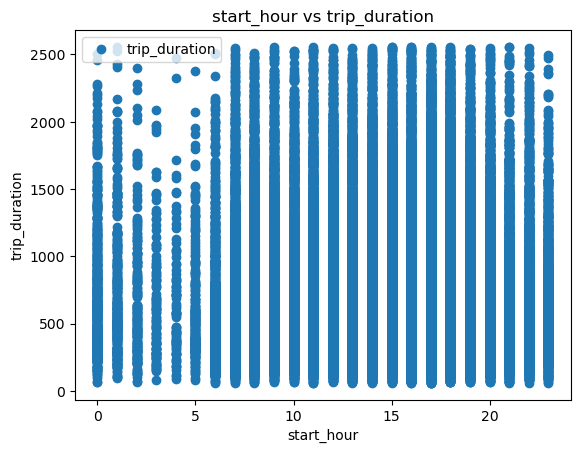

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_no_outliers.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('start_hour vs trip_duration')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [15]:
X = df_no_outliers['start_hour'].values.reshape(-1,1)
y = df_no_outliers['trip_duration'].values.reshape(-1,1)

In [16]:
X

array([[18],
       [18],
       [19],
       ...,
       [17],
       [18],
       [21]])

In [17]:
y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1191],
       [1050],
       [ 370]])

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis


In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

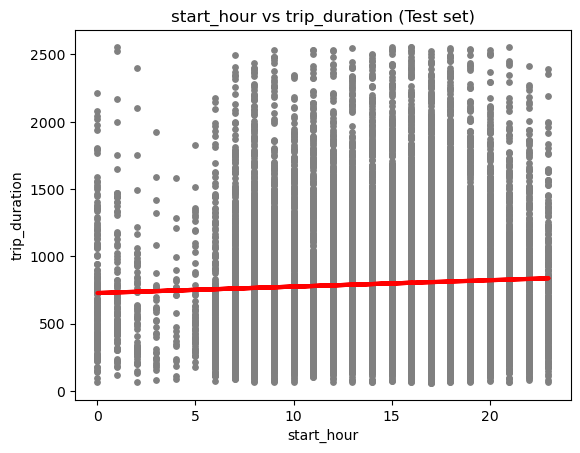

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('start_hour vs trip_duration (Test set)')
plot_test.xlabel('start_hour')
plot_test.ylabel('trip_duration')
plot_test.show()

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.76594313]]
Mean squared error:  250642.71871552392
R2 score:  0.0027341689538582514


In [25]:
y_predicted

array([[736.45347194],
       [807.94261887],
       [827.00639138],
       ...,
       [784.11290323],
       [817.47450513],
       [803.17667574]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,838,736.453472
1,569,807.942619
2,1085,827.006391
3,622,807.942619
4,428,779.346960
5,313,822.240448
6,806,807.942619
7,541,765.049131
8,629,784.112903
9,527,812.708562


##### Compare how the regression fits the training set

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.76594313]]
Mean squared error:  251082.34830151475
R2 score:  0.0021307703614635853


MSE is very large here. the model is not a good fit?

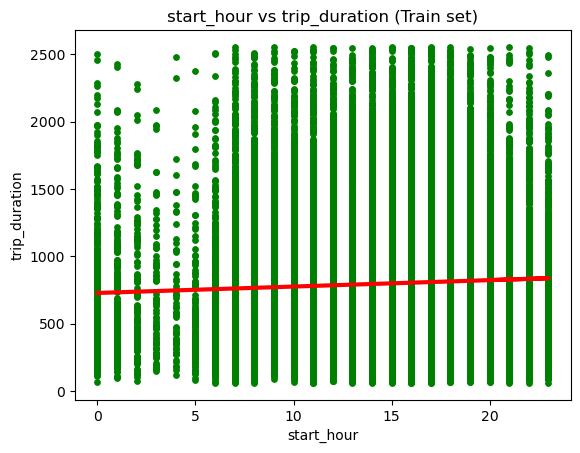

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('start_hour vs trip_duration (Train set)')
plot_test.xlabel('start_hour')
plot_test.ylabel('trip_duration')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [33]:
# Clean the extreme values from the "trip_duration" variable observed during the consistency checks.

df_test = df_no_outliers[df_no_outliers['trip_duration'] <= 60] 

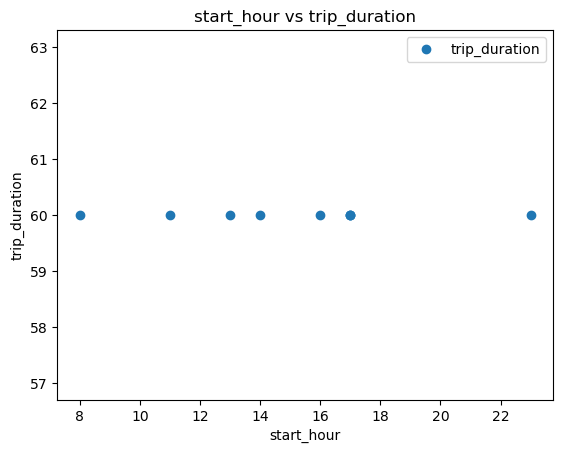

In [34]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'start_hour', y='trip_duration', style='o')  
plt.title('start_hour vs trip_duration')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()